In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge , Lasso
from sklearn.preprocessing import PolynomialFeatures
import warnings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
def f(x):
  return 0.2 + np.cos(8*(x-1))

In [ ]:
def generate_data (n_samples=100):
  x = np.sort(np.random.rand(n_samples))
  y = f(x) + 0.3*(np.random.randn(n_samples))
  return x,y

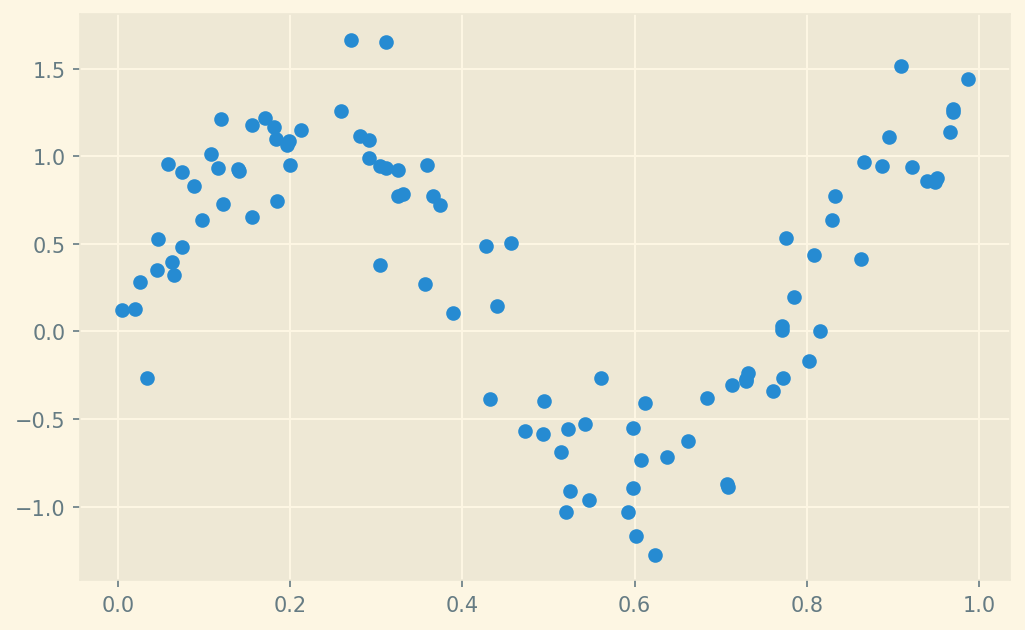

In [ ]:
n_samples = 100
x,y=generate_data(n_samples)
plt.scatter(x,y)
#plotting setup
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['figure.dpi'] = 150
plt.style.use('Solarize_Light2')
np.random.seed(42)
np.set_printoptions(precision=2, linewidth=50)

In [ ]:
def fit_poly(x,y,d=1):
  polynomial_features = PolynomialFeatures(degree=d)
  ln_rg = LinearRegression()
  model = Pipeline([('polynomial_features',polynomial_features),('linear_regression',ln_rg)])
  model.fit(x[:,None],y)
  return model

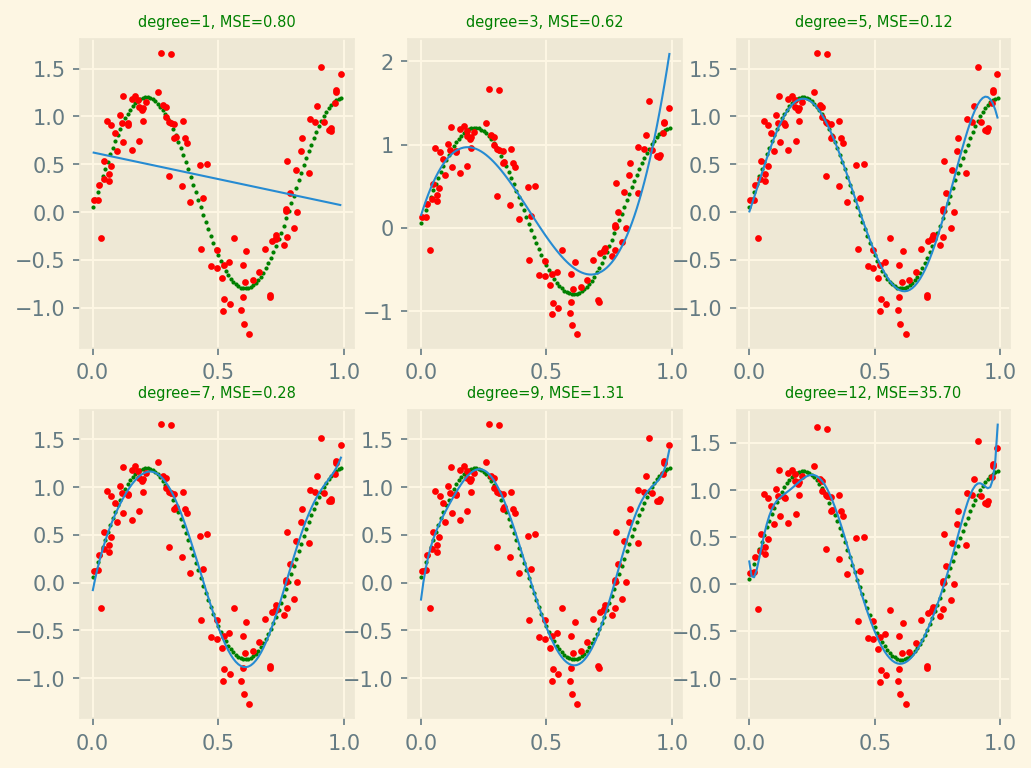

In [ ]:
plt.figure(figsize=(8,6))
degree =[1,3,5,7,9,12]
for d in degree:
  model = fit_poly(x,y,d) #regressor
  plt.subplot(2,3,degree.index(d)+1)
  x_test = np.arange(0,1,0.01)
  plt.scatter(x_test,f(x_test),color='g',s=1) #ideal fitness
  plt.scatter(x,y,color = 'r',s = 5) #plot the generated data based on the curve
  plt.plot(x_test,model.predict(x_test[:,None]),lw=1) #plot the model prediction on test set
  scores = cross_val_score(model,x[:,None],y, scoring="neg_mean_squared_error",cv=10) #evaluating
  plt.title("degree={}, MSE={:.2f}".format(d, -scores.mean()), fontsize=7, color="green")
plt.show()

In [ ]:
def plot_coef(weight):
  plt.figure(figsize=(7,3))
  plt.bar(np.arange(1,len(weight)+1),height = np.abs(weight))
  plt.show()

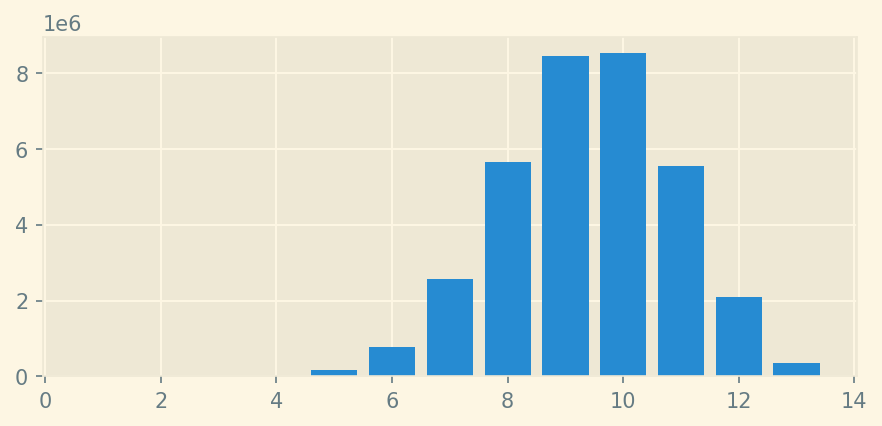

In [ ]:
plot_coef(model.steps[1][1].coef_)

In [ ]:
def fit_L2(d=1,lmbda=1.0):
  polynomial_features = PolynomialFeatures(degree=d)
  ln_rg = Ridge(alpha=lmbda)
  model = Pipeline([('polynomial_features',polynomial_features),('linear_regression',ln_rg)])
  model.fit(x[:,None],y)
  return model

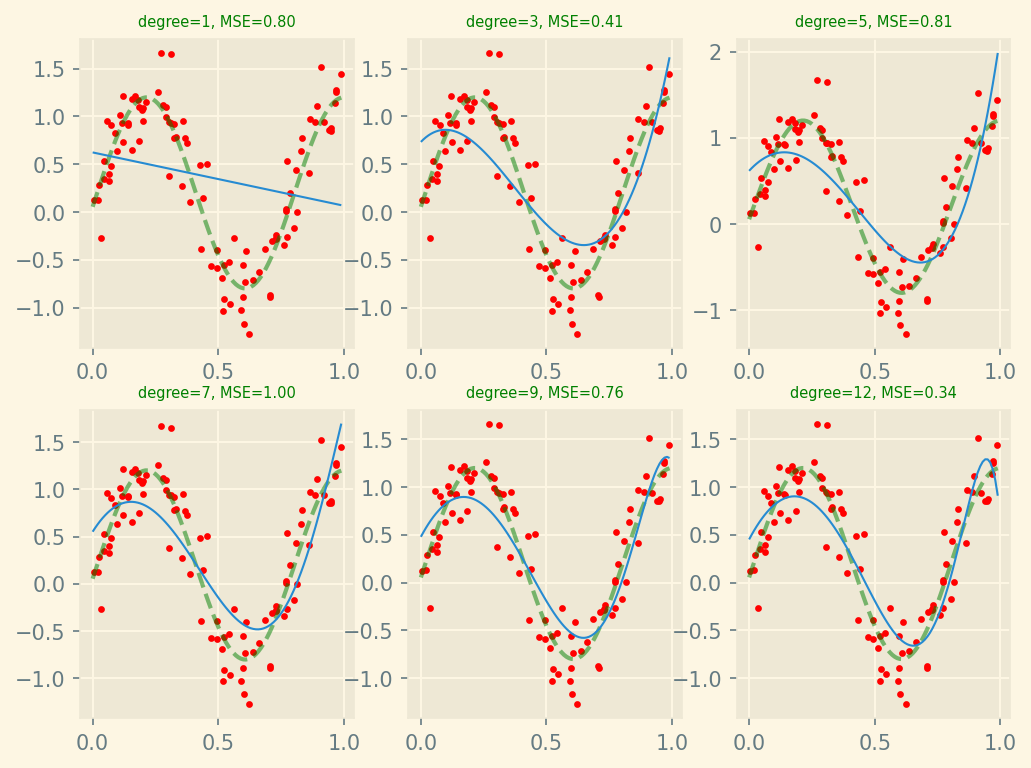

In [ ]:
plt.figure(figsize=(8,6))
lmbda = 0.01
for d in degree:
  model = fit_L2(d,lmbda) #regressor
  plt.subplot(2,3,degree.index(d)+1)
  x_test = np.arange(0,1,0.01)
  plt.plot(x_test,f(x_test),'g--',alpha=0.5) #plot the original curve
  plt.scatter(x,y,color = 'r',s=5) #plot the generated data based on the original curve
  plt.plot(x_test , model.predict(x_test[:,None]),lw=1) #plot the model prediction on test set
  scores = cross_val_score(model,x[:,None],y,scoring='neg_mean_squared_error',cv=10)
  plt.title("degree={}, MSE={:.2f}".format(d, -scores.mean()), fontsize=7, color="green")
plt.show()

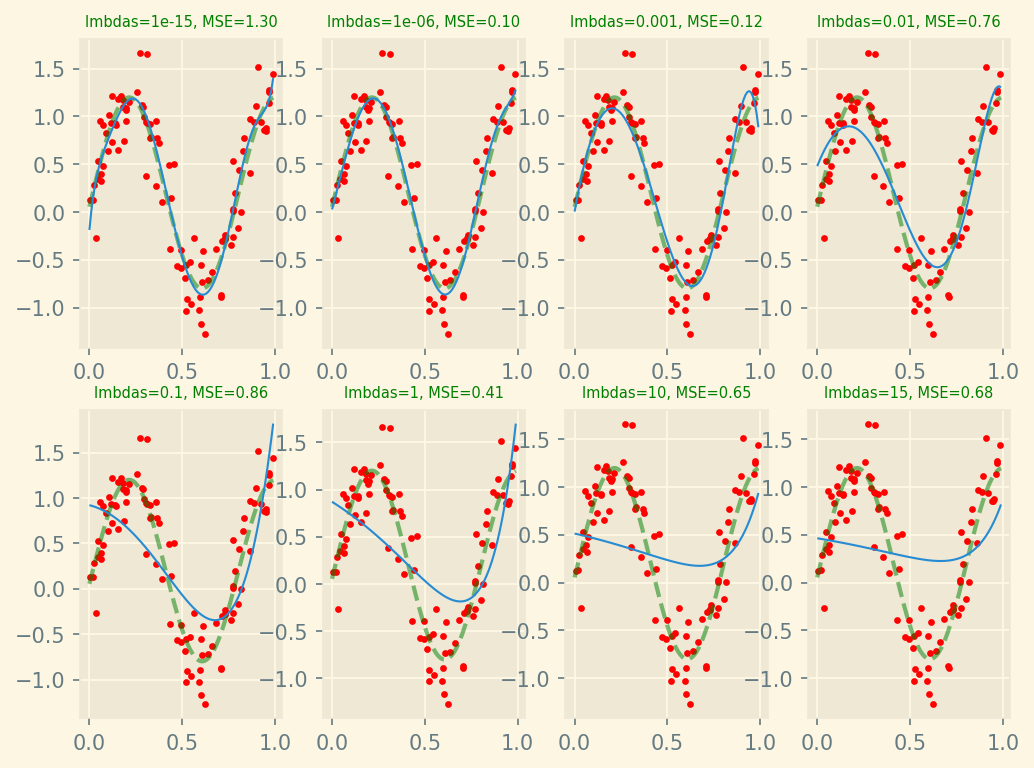

In [ ]:
plt.figure(figsize=(8,6))
d = 9
lmbdas = [1e-15, 1e-6, 1e-3, 1e-2, 1e-1, 1, 10, 15]

for lmbda in lmbdas:
  model = fit_L2(d,lmbda)
  plt.subplot(2,4,lmbdas.index(lmbda)+1)
  x_test = np.arange(0,1,0.01)
  plt.plot(x_test,f(x_test),'g--',alpha=0.5) #plot the original curve
  plt.scatter(x,y,color = 'r',s=5) #plot the generated data based on the original curve
  plt.plot(x_test , model.predict(x_test[:,None]),lw=1) #plot the model prediction (regressor)
  scores = cross_val_score(model,x[:,None],y,scoring='neg_mean_squared_error',cv=10)
  plt.title("lmbdas={}, MSE={:.2f}".format(lmbda, -scores.mean()), fontsize=7, color="green")
plt.show()

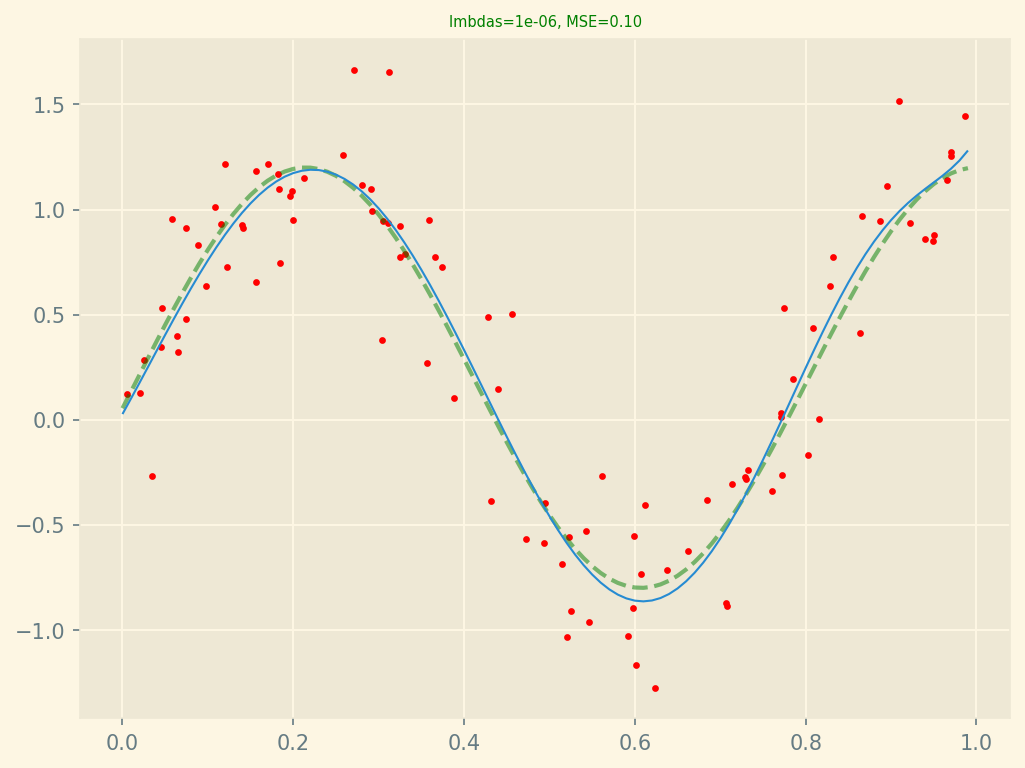

In [ ]:
plt.figure(figsize=(8,6))
d = 9
lmbda = 1e-6
model = fit_L2(d,lmbda)
x_test = np.arange(0,1,0.01)
plt.plot(x_test,f(x_test),'g--',alpha=0.5) #plot the original curve
plt.scatter(x,y,color = 'r',s=5) #plot the generated data based on the original curve
plt.plot(x_test , model.predict(x_test[:,None]),lw=1) #plot the model prediction (regressor)
scores = cross_val_score(model,x[:,None],y,scoring='neg_mean_squared_error',cv=10)
plt.title("lmbdas={}, MSE={:.2f}".format(lmbda, -scores.mean()), fontsize=7, color="green")
plt.show()

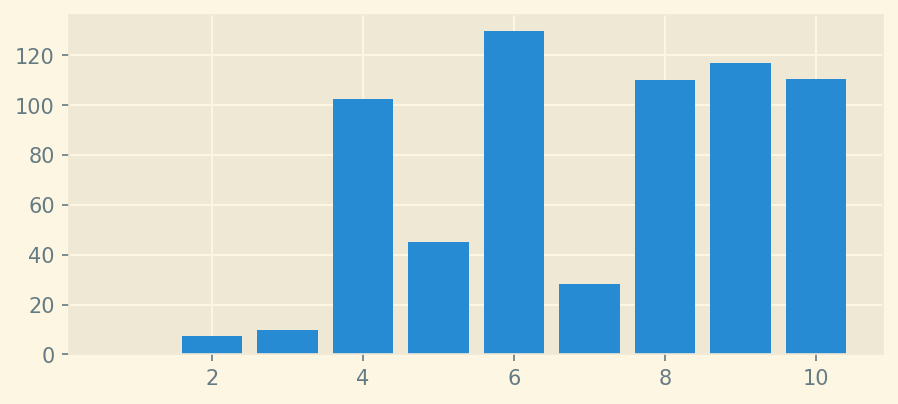

In [ ]:
def plot_coef(weight):
  plt.figure(figsize=(7,3))
  plt.bar(np.arange(1,len(weight)+1),height = np.abs(weight))
  plt.show()
plot_coef(model.steps[1][1].coef_)

In [ ]:
def fit_L1(d=1,lmbda=1.0):
  polynomial_features = PolynomialFeatures(degree=d)
  ln_rg = Lasso(alpha=lmbda)
  model = Pipeline([('polynomial_features',polynomial_features),('linear_regression',ln_rg)])
  model.fit(x[:,None],y)
  return model

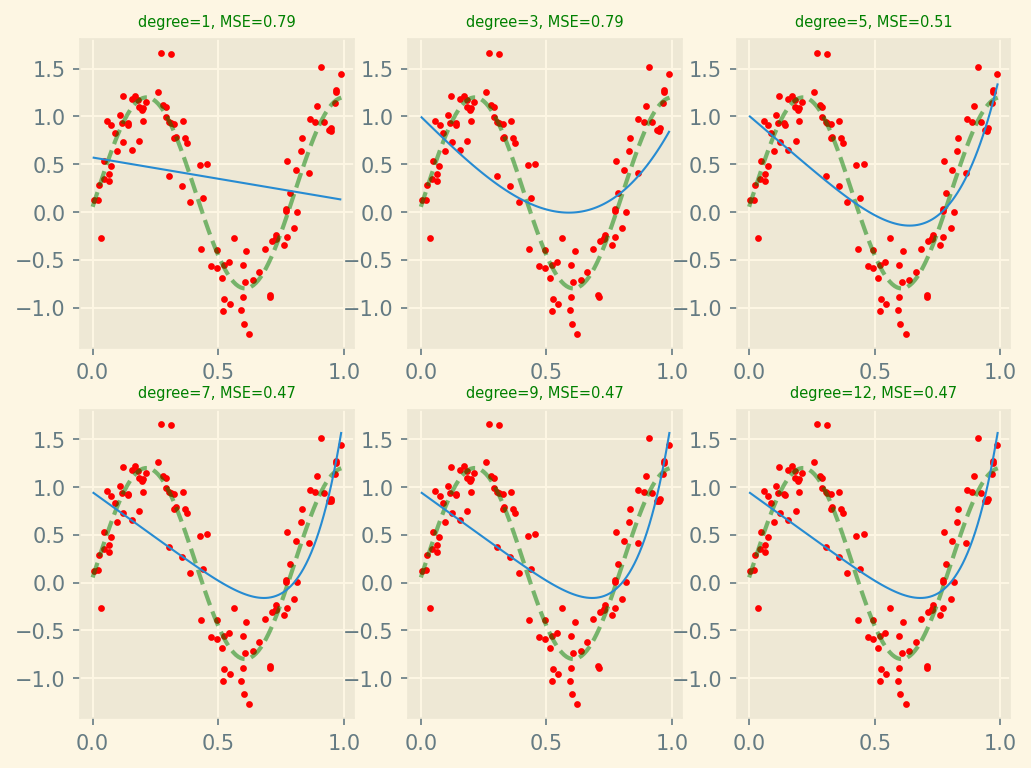

In [ ]:
plt.figure(figsize=(8,6))
lmbda = 0.01
for d in degree:
  model = fit_L1(d,lmbda)
  plt.subplot(2,3,degree.index(d)+1)
  x_test = np.arange(0,1,0.01)
  plt.plot(x_test,f(x_test),'g--',alpha=0.5) #plot the original curve
  plt.scatter(x,y,color = 'r',s=5) #plot the generated data based on the original curve
  plt.plot(x_test , model.predict(x_test[:,None]),lw=1) #plot the model prediction (regressor)
  scores = cross_val_score(model,x[:,None],y,scoring='neg_mean_squared_error',cv=10)
  plt.title("degree={}, MSE={:.2f}".format(d, -scores.mean()), fontsize=7, color="green")
plt.show()

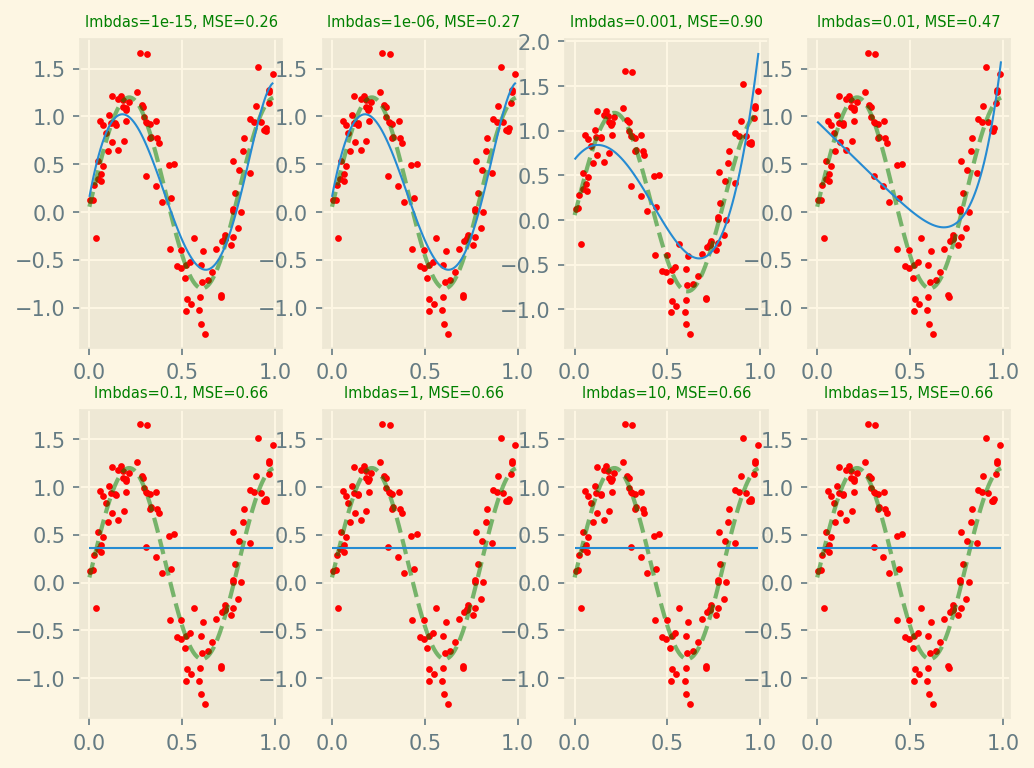

In [ ]:
plt.figure(figsize=(8,6))
d = 7
lmbdas = [1e-15, 1e-6, 1e-3, 1e-2, 1e-1, 1, 10, 15]

for lmbda in lmbdas:
  model = fit_L1(d,lmbda)
  plt.subplot(2,4,lmbdas.index(lmbda)+1)
  x_test = np.arange(0,1,0.01)
  plt.plot(x_test,f(x_test),'g--',alpha=0.5) #plot the original curve
  plt.scatter(x,y,color = 'r',s=5) #plot the generated data based on the original curve
  plt.plot(x_test , model.predict(x_test[:,None]),lw=1) #plot the model prediction (regressor)
  scores = cross_val_score(model,x[:,None],y,scoring='neg_mean_squared_error',cv=10)
  plt.title("lmbdas={}, MSE={:.2f}".format(lmbda, -scores.mean()), fontsize=7, color="green")
plt.show()

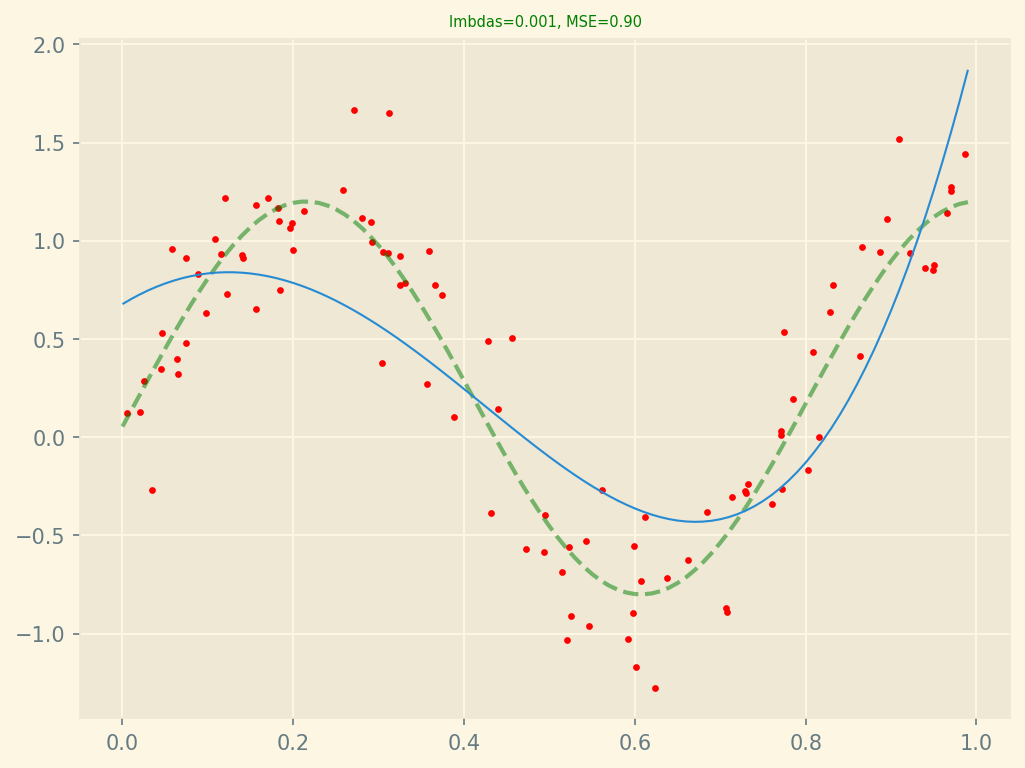

In [ ]:
plt.figure(figsize=(8,6))
d = 7
lmbda = 0.001

model = fit_L1(d,lmbda)
x_test = np.arange(0,1,0.01)
plt.plot(x_test,f(x_test),'g--',alpha=0.5) #plot the original curve
plt.scatter(x,y,color = 'r',s=5) #plot the generated data based on the original curve
plt.plot(x_test , model.predict(x_test[:,None]),lw=1) #plot the model prediction (regressor)
scores = cross_val_score(model,x[:,None],y,scoring='neg_mean_squared_error',cv=10)
plt.title("lmbdas={}, MSE={:.2f}".format(lmbda, -scores.mean()), fontsize=7, color="green")
plt.show()

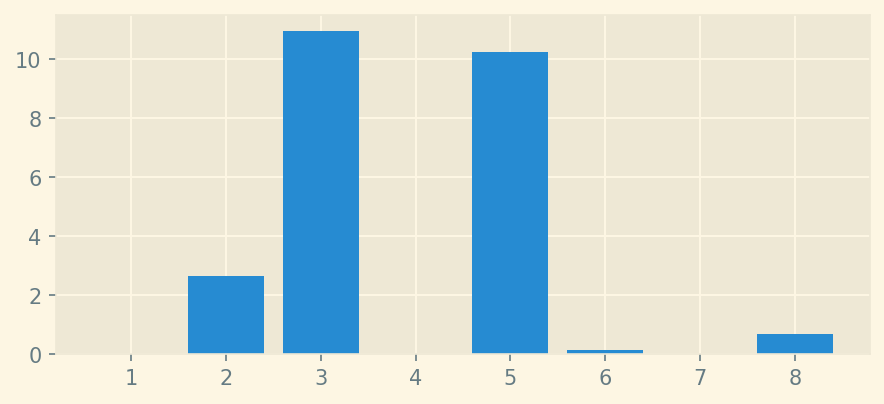

In [ ]:
def plot_coef(weight):
  plt.figure(figsize=(7,3))
  plt.bar(np.arange(1,len(weight)+1),height = np.abs(weight))
  plt.show()
plot_coef(model.steps[1][1].coef_)